# Data, Data Science Bowl 2017  
cf. https://www.kaggle.com/c/data-science-bowl-2017/data

I had to `sudo dnf install p7zip` and install `p7zip` (yet another software repo) just to extract the images.  

* `data_password.txt.zip` - contains decryption key for the image files; needed to extract.  9$kAsfpQ*FtH 
* **`sample_images.7z`** - smaller subset of full dataset, provided for people who wish to preview images before large file `stage1.7z`, File size 781.39 MB

In [1]:
import os, sys
os.getcwd()
os.listdir( os.getcwd() ) 

['2017datascibowl',
 'data_password.txt',
 'LSTM_model201702271930.save',
 'cleaning_dueSigmaFin.pyc',
 'LSTM_model201702280608.save',
 '.ipynb_checkpoints',
 'dueSigmaFinancial_kaggle.py',
 'LSTM_model.save',
 'LSTM_model201703012346.save',
 'DatSciBow2017_FullPreprocessTutorial.ipynb',
 'LSTM_model201702282350.save',
 'GRU_model201703022010.save',
 'DueSigmaFin_runs.ipynb',
 'ImagePreprocessing.ipynb',
 'dueSigmaFinancial_local.ipynb',
 'GRU_model201703012348.save',
 'GRU_model201703050709.save',
 'GRU_model201703021741.save',
 'kaggle.ipynb',
 'glass.csv',
 'DatSciBow2017_SVM.ipynb',
 '__init__.py',
 'train.h5',
 'dueSigmaFinancial_local_GRUs.ipynb',
 'cleaning_dueSigmaFin.py']

In [7]:
os.listdir( os.getcwd() + "/2017datascibowl/sample_images/") 

['0d2fcf787026fece4e57be167d079383',
 '0a0c32c9e08cc2ea76a71649de56be6d',
 '0de72529c30fe642bc60dcb75c87f6bd',
 '0b20184e0cd497028bdd155d9fb42dc9',
 '00cba091fa4ad62cc3200a657aeb957e',
 '0acbebb8d463b4b9ca88cf38431aac69',
 '0c0de3749d4fe175b7a5098b060982a1',
 '0ca943d821204ceb089510f836a367fd',
 '0d19f1c627df49eb223771c28548350e',
 '0ddeb08e9c97227853422bd71a2a695e',
 '0c98fcb55e3f36d0c2b6507f62f4c5f1',
 '0a38e7597ca26f9374f8ea2770ba870d',
 '0a099f2549429d29b32f349e95fb2244',
 '0c59313f52304e25d5a7dcf9877633b1',
 '0c9d8314f9c69840e25febabb1229fa4',
 '0c37613214faddf8701ca41e6d43f56e',
 '0d941a3ad6c889ac451caf89c46cb92a',
 '0d06d764d3c07572074d468b4cff954f',
 '0bd0e3056cbf23a1cb7f0f0b18446068',
 '0c60f4b87afcb3e2dfa65abbbf3ef2f9']

In [9]:
os.getcwd()

'/home/topolo/PropD/MLgrabbag/kaggle'

cf. [Full Preprocessing Tutorial](https://www.kaggle.com/jyotiislam/data-science-bowl-2017/full-preprocessing-tutorial)

In [2]:
%matplotlib inline

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt

In [45]:
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [3]:
# Some constants
INPUT_FOLDER = './2017datascibowl/sample_images/'
patients=os.listdir(INPUT_FOLDER)
patients.sort()

In [13]:
patients

['00cba091fa4ad62cc3200a657aeb957e',
 '0a099f2549429d29b32f349e95fb2244',
 '0a0c32c9e08cc2ea76a71649de56be6d',
 '0a38e7597ca26f9374f8ea2770ba870d',
 '0acbebb8d463b4b9ca88cf38431aac69',
 '0b20184e0cd497028bdd155d9fb42dc9',
 '0bd0e3056cbf23a1cb7f0f0b18446068',
 '0c0de3749d4fe175b7a5098b060982a1',
 '0c37613214faddf8701ca41e6d43f56e',
 '0c59313f52304e25d5a7dcf9877633b1',
 '0c60f4b87afcb3e2dfa65abbbf3ef2f9',
 '0c98fcb55e3f36d0c2b6507f62f4c5f1',
 '0c9d8314f9c69840e25febabb1229fa4',
 '0ca943d821204ceb089510f836a367fd',
 '0d06d764d3c07572074d468b4cff954f',
 '0d19f1c627df49eb223771c28548350e',
 '0d2fcf787026fece4e57be167d079383',
 '0d941a3ad6c889ac451caf89c46cb92a',
 '0ddeb08e9c97227853422bd71a2a695e',
 '0de72529c30fe642bc60dcb75c87f6bd']

# Loading the files

In [14]:
# Load the scans in given folder path
def load_scan(path):
    """
    INPUTS/ARGUMENTS 
    ================
    @type path : Python string
    
    @type slices : Python list (for each file in a folder/directory of dicom.dataset.FileDataset  
    each is a slice of the single patient's lung
    """
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

In [69]:
image_test = np.stack([s.pixel_array for s in load_scan(INPUT_FOLDER+patients[0])])

In [71]:
print(image_test.shape);print(image_test.dtype)

(134, 512, 512)
int16


In [72]:
pd.DataFrame( image_test[0]).describe()

0            1            2            3            4    \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean  -1817.480469 -1687.929688 -1600.953125 -1523.867188 -1467.464844   
std     707.955168   893.832547   991.304186  1065.634957  1114.995762   
min   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
25%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
50%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
75%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
max    1062.000000  1090.000000  1068.000000  1076.000000  1076.000000   

               5            6            7            8            9    \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean  -1413.097656 -1359.531250 -1316.011719 -1271.882812 -1227.421875   
std    1155.741711  1191.352015  1217.971285  1243.673746  1267.897664   
min   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
25%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
50%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
75%   -2000.000000 -2000.000000 -2000.000000    58.500000   178.000000   
max    1084.000000  1118.000000  1110.000000  1118.000000  1070.000000   

          ...               502          503          504          505  \
count     ...        512.000000   512.000000   512.000000   512.000000   
mean      ...      -1234.949219 -1278.269531 -1321.933594 -1366.171875   
std       ...       1257.301007  1234.392217  1209.006865  1180.214144   
min       ...      -2000.000000 -2000.000000 -2000.000000 -2000.000000   
25%       ...      -2000.000000 -2000.000000 -2000.000000 -2000.000000   
50%       ...      -2000.000000 -2000.000000 -2000.000000 -2000.000000   
75%       ...        101.500000    28.500000 -2000.000000 -2000.000000   
max       ...       1070.000000  1040.000000  1046.000000  1108.000000   

               506          507          508          509          510  \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean  -1419.917969 -1472.910156 -1527.789062 -1602.140625 -1686.277344   
std    1143.906186  1104.989222  1057.894768   988.719528   897.840990   
min   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
25%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
50%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
75%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
max    1032.000000  1076.000000  1092.000000  1070.000000  1018.000000   

               511  
count   512.000000  
mean  -1816.578125  
std     711.176932  
min   -2000.000000  
25%   -2000.000000  
50%   -2000.000000  
75%   -2000.000000  
max    1038.000000  

[8 rows x 512 columns]

In [73]:
pd.DataFrame( image_test[1]).describe()

0            1            2            3            4    \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean  -1820.785156 -1693.468750 -1605.542969 -1526.933594 -1469.355469   
std     696.348879   880.072154   981.704601  1059.962254  1111.883407   
min   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
25%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
50%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
75%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
max    1070.000000  1048.000000  1088.000000  1136.000000  1072.000000   

               5            6            7            8            9    \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean  -1413.863281 -1360.519531 -1316.566406 -1272.644531 -1228.250000   
std    1155.108780  1190.254072  1217.500664  1242.583521  1266.651168   
min   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
25%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
50%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
75%   -2000.000000 -2000.000000 -2000.000000    51.000000   165.000000   
max    1090.000000  1080.000000  1102.000000  1070.000000  1108.000000   

          ...               502          503          504          505  \
count     ...        512.000000   512.000000   512.000000   512.000000   
mean      ...      -1234.457031 -1277.929688 -1321.339844 -1366.078125   
std       ...       1257.511898  1234.274330  1209.383344  1180.197301   
min       ...      -2000.000000 -2000.000000 -2000.000000 -2000.000000   
25%       ...      -2000.000000 -2000.000000 -2000.000000 -2000.000000   
50%       ...      -2000.000000 -2000.000000 -2000.000000 -2000.000000   
75%       ...        129.500000    42.000000 -2000.000000 -2000.000000   
max       ...       1044.000000  1074.000000  1042.000000  1040.000000   

               506          507          508          509          510  \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean  -1420.300781 -1474.128906 -1528.585938 -1602.785156 -1687.871094   
std    1143.005183  1102.343928  1056.282430   987.581466   894.045774   
min   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
25%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
50%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
75%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
max    1042.000000  1050.000000  1072.000000  1086.000000  1064.000000   

               511  
count   512.000000  
mean  -1816.843750  
std     710.258754  
min   -2000.000000  
25%   -2000.000000  
50%   -2000.000000  
75%   -2000.000000  
max    1064.000000  

[8 rows x 512 columns]

In [74]:
len(image_test == -2000) # set outside-of-scan pixels to 0 

134

In [75]:
print( image_test.min() )

-2000


$N_x=512$, so $N_x\in \mathbb{Z}^+$      
$N_y=512$, so $N_y\in \mathbb{Z}^+$   
For each patient, $m_{\text{slice}} \in \mathbb{Z}^+$ represents the number of "slices", image "slices" of the single patient's lung.  

So first make, for each patient, $(i_{\text{slice}}, P_{\text{arr}}) \in \lbrace 0,1,\dots m_{\text{slice}}-1  \rbrace \times \mathbb{K}^{N_x \times N_y } $

In [37]:
def get_pixels_hu(slices):
    """
    INPUTS/ARGUMENTS
    ================
    @type slices : Python list of dicom.dataset.FileDataset, 
    @param slices : each dicom.dataset.FileDataset representing an image "slice" of a single patient's lung
    """
    image = np.stack([s.pixel_array for s in slices]) # np.array image.shape (134,512,512)
    # Convert to int16 (from sometimes int16),
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)
    
    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    # suggested by Henry Wolf to avoid -2048 values
    outside_of_image_val = image.min()
    image[image == outside_of_image_val] = 0 
    
    image[image == -2000] = 0 
    
    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
        
    return np.array(image, dtype=np.int16)

Let's take a look at 1 of the patients.

In [57]:
patients[0]

'00cba091fa4ad62cc3200a657aeb957e'

In [58]:
first_patient = load_scan(INPUT_FOLDER + patients[0])

In [59]:
print(type(first_patient));print(len(first_patient));print(type(first_patient[0]))
print(type(first_patient[0].pixel_array)); print(first_patient[0].pixel_array.shape)

<type 'list'>
134
<class 'dicom.dataset.FileDataset'>
<type 'numpy.ndarray'>
(512, 512)


In [94]:
first_patient[0]

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.55.247817952625791837963403492891187883824
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: '00cba091fa4ad62cc3200a657aeb957e'
(0010, 0020) Patient ID                          LO: '00cba091fa4ad62cc3200a657aeb957e'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0050) Slice Thickness                     DS: '2.5'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.86208730140539712382771890501772734277950692397709007305473
(0020, 000e) Series Instance UID                 UI: 2.25.11575877329635228925808596800269974740893519451784626046614
(0020, 0011) Series Number               

In [95]:
dir( first_patient[0] )

['AcquisitionNumber',
 'BitsAllocated',
 'BitsStored',
 'Columns',
 'FrameOfReferenceUID',
 'HighBit',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'InstanceNumber',
 'KVP',
 'Modality',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PhotometricInterpretation',
 'PixelData',
 'PixelPaddingValue',
 'PixelRepresentation',
 'PixelSpacing',
 'PositionReferenceIndicator',
 'RescaleIntercept',
 'RescaleSlope',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SliceLocation',
 'SliceThickness',
 'SpecificCharacterSet',
 'StudyInstanceUID',
 'WindowCenter',
 'WindowWidth',
 '__cmp__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setatt

In [59]:
first_patient_pixels = get_pixels_hu(first_patient)

In [60]:
print(type(first_patient_pixels));print(first_patient_pixels.shape)

<type 'numpy.ndarray'>
(134, 512, 512)


In [78]:
pd.DataFrame( first_patient[0].pixel_array ).describe()

0            1            2            3            4    \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean  -1817.480469 -1687.929688 -1600.953125 -1523.867188 -1467.464844   
std     707.955168   893.832547   991.304186  1065.634957  1114.995762   
min   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
25%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
50%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
75%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
max    1062.000000  1090.000000  1068.000000  1076.000000  1076.000000   

               5            6            7            8            9    \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean  -1413.097656 -1359.531250 -1316.011719 -1271.882812 -1227.421875   
std    1155.741711  1191.352015  1217.971285  1243.673746  1267.897664   
min   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
25%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
50%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
75%   -2000.000000 -2000.000000 -2000.000000    58.500000   178.000000   
max    1084.000000  1118.000000  1110.000000  1118.000000  1070.000000   

          ...               502          503          504          505  \
count     ...        512.000000   512.000000   512.000000   512.000000   
mean      ...      -1234.949219 -1278.269531 -1321.933594 -1366.171875   
std       ...       1257.301007  1234.392217  1209.006865  1180.214144   
min       ...      -2000.000000 -2000.000000 -2000.000000 -2000.000000   
25%       ...      -2000.000000 -2000.000000 -2000.000000 -2000.000000   
50%       ...      -2000.000000 -2000.000000 -2000.000000 -2000.000000   
75%       ...        101.500000    28.500000 -2000.000000 -2000.000000   
max       ...       1070.000000  1040.000000  1046.000000  1108.000000   

               506          507          508          509          510  \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean  -1419.917969 -1472.910156 -1527.789062 -1602.140625 -1686.277344   
std    1143.906186  1104.989222  1057.894768   988.719528   897.840990   
min   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
25%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
50%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
75%   -2000.000000 -2000.000000 -2000.000000 -2000.000000 -2000.000000   
max    1032.000000  1076.000000  1092.000000  1070.000000  1018.000000   

               511  
count   512.000000  
mean  -1816.578125  
std     711.176932  
min   -2000.000000  
25%   -2000.000000  
50%   -2000.000000  
75%   -2000.000000  
max    1038.000000  

[8 rows x 512 columns]

In [79]:
pd.DataFrame( first_patient_pixels[0] ).describe()

0            1            2            3            4    \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean   -966.480469  -930.679688  -906.203125  -883.804688  -866.464844   
std     224.157330   274.629669   304.335981   328.576139   345.914498   
min   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
25%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
50%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
75%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
max      38.000000    66.000000    44.000000    52.000000    52.000000   

               5            6            7            8            9    \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean   -851.160156  -836.656250  -824.386719  -811.507812  -798.296875   
std     358.437364   369.176445   376.330536   384.415168   392.553492   
min   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
25%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
50%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
75%   -1024.000000 -1024.000000 -1024.000000  -965.500000  -846.000000   
max      60.000000    94.000000    86.000000    94.000000    46.000000   

          ...               502          503          504          505  \
count     ...        512.000000   512.000000   512.000000   512.000000   
mean      ...       -805.824219  -817.894531  -830.308594  -843.296875   
std       ...        386.340177   379.173388   371.286996   361.194807   
min       ...      -1024.000000 -1024.000000 -1024.000000 -1024.000000   
25%       ...      -1024.000000 -1024.000000 -1024.000000 -1024.000000   
50%       ...      -1024.000000 -1024.000000 -1024.000000 -1024.000000   
75%       ...       -922.500000  -995.500000 -1024.000000 -1024.000000   
max       ...         46.000000    16.000000    22.000000    84.000000   

               506          507          508          509          510  \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean   -857.980469  -871.910156  -887.726562  -907.390625  -929.027344   
std     350.621332   339.373499   323.425095   302.642898   276.957186   
min   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
25%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
50%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
75%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
max       8.000000    52.000000    68.000000    46.000000    -6.000000   

               511  
count   512.000000  
mean   -965.578125  
std     226.777876  
min   -1024.000000  
25%   -1024.000000  
50%   -1024.000000  
75%   -1024.000000  
max      14.000000  

[8 rows x 512 columns]

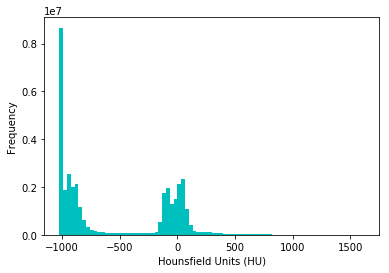

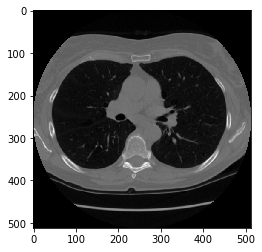

In [61]:
plt.hist(first_patient_pixels.flatten(),bins=80,color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()  

# Show some slice in the middle
plt.imshow(first_patient_pixels[80],cmap=plt.cm.gray)
plt.show()

In [32]:
print(type(first_patient_pixels));print(first_patient_pixels.shape);print(first_patient_pixels.dtype)

<type 'numpy.ndarray'>
(134, 512, 512)
int16


In [35]:
pd.DataFrame(first_patient_pixels[0]).describe()

0            1            2            3            4    \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean   -966.480469  -930.679688  -906.203125  -883.804688  -866.464844   
std     224.157330   274.629669   304.335981   328.576139   345.914498   
min   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
25%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
50%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
75%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
max      38.000000    66.000000    44.000000    52.000000    52.000000   

               5            6            7            8            9    \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean   -851.160156  -836.656250  -824.386719  -811.507812  -798.296875   
std     358.437364   369.176445   376.330536   384.415168   392.553492   
min   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
25%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
50%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
75%   -1024.000000 -1024.000000 -1024.000000  -965.500000  -846.000000   
max      60.000000    94.000000    86.000000    94.000000    46.000000   

          ...               502          503          504          505  \
count     ...        512.000000   512.000000   512.000000   512.000000   
mean      ...       -805.824219  -817.894531  -830.308594  -843.296875   
std       ...        386.340177   379.173388   371.286996   361.194807   
min       ...      -1024.000000 -1024.000000 -1024.000000 -1024.000000   
25%       ...      -1024.000000 -1024.000000 -1024.000000 -1024.000000   
50%       ...      -1024.000000 -1024.000000 -1024.000000 -1024.000000   
75%       ...       -922.500000  -995.500000 -1024.000000 -1024.000000   
max       ...         46.000000    16.000000    22.000000    84.000000   

               506          507          508          509          510  \
count   512.000000   512.000000   512.000000   512.000000   512.000000   
mean   -857.980469  -871.910156  -887.726562  -907.390625  -929.027344   
std     350.621332   339.373499   323.425095   302.642898   276.957186   
min   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
25%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
50%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
75%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
max       8.000000    52.000000    68.000000    46.000000    -6.000000   

               511  
count   512.000000  
mean   -965.578125  
std     226.777876  
min   -1024.000000  
25%   -1024.000000  
50%   -1024.000000  
75%   -1024.000000  
max      14.000000  

[8 rows x 512 columns]

# Resampling  

A scan may have a pixel spacing of `[2.5, 0.5, 0.5]`, which means that the distance between slices is `2.5` millimeters.  For a different scan this may be `[1.5, 0.725, 0.725]`, this can be problematic for automatic analysis (e.g. using ConvNets)!  

In [62]:
def resample(image, scan, new_spacing=[1,1,1]):
    # Determine current pixel spacing
    spacing = np.array([scan[0].SliceThickness] + scan[0].PixelSpacing, dtype=np.float32)
    
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
    
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
    
    return image, new_spacing

Let's resample our patient's pixels to an isomorphic resolution of 1 by 1 by 1 mm.  

In [63]:
pix_resampled, spacing = resample(first_patient_pixels, first_patient, [1,1,1])

In [64]:
print("Shape before resampling\t", first_patient_pixels.shape)
print("Shape after resample\t",pix_resampled.shape)

('Shape before resampling\t', (134, 512, 512))
('Shape after resample\t', (335, 306, 306))


In [39]:
print(first_patient[0].SliceThickness);print(first_patient[0].PixelSpacing)

2.5
['0.597656', '0.597656']


In [40]:
np.array( [2.5]+first_patient[0].PixelSpacing)/[1,1,1]

array([ 2.5     ,  0.597656,  0.597656])

In [42]:
first_patient_pixels.shape

(134, 512, 512)

In [81]:
# My stuff, each scan or image "slice" is a dicom.dataSet.FileDataSet 
print(first_patient[0].SliceThickness)
print(first_patient[0].PixelSpacing)

2.5
['0.597656', '0.597656']


In [83]:
print( np.array( [first_patient[0].SliceThickness]+first_patient[0].PixelSpacing)/ [1,1,1] )

[ 2.5       0.597656  0.597656]


In [82]:
first_patient_pixels.shape

(134, 512, 512)

In [100]:
first_patient_pixels.shape * np.array( [first_patient[0].SliceThickness]+first_patient[0].PixelSpacing)/ [1,1,1] 

array([ 335.      ,  305.999872,  305.999872])

In [101]:
np.round( first_patient_pixels.shape * np.array( [first_patient[0].SliceThickness]+first_patient[0].PixelSpacing)/ [1,1,1]  )

array([ 335.,  306.,  306.])

In [103]:
np.round( first_patient_pixels.shape * np.array( [first_patient[0].SliceThickness]+first_patient[0].PixelSpacing)/ [1,1,1]  ) / first_patient_pixels.shape

array([ 2.5       ,  0.59765625,  0.59765625])

In [102]:
np.round( first_patient_pixels.shape * np.array( [first_patient[0].SliceThickness]+first_patient[0].PixelSpacing)/ [1,1,1]  ) / first_patient_pixels.shape

array([ 2.5       ,  0.59765625,  0.59765625])

In [86]:
print(type(pix_resampled));print(type(spacing));print(pix_resampled.shape);print(spacing.shape); print(spacing)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(335, 306, 306)
(3,)
[ 1.         0.9999996  0.9999996]


In [88]:
for image_slice in first_patient:
    print(image_slice.pixel_array.shape)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

In [107]:
[1000,2000,3000]/np.array(first_patient_pixels.shape).astype("float32")

array([ 7.46268657,  3.90625   ,  5.859375  ])

In [79]:
def resample_given_dims(image, scan, new_shape):
    # Determine current pixel spacing
    spacing = np.array([scan[0].SliceThickness] + scan[0].PixelSpacing, dtype=np.float32)  # (\Delta z,\Delta x,\Delta y)
#    print(spacing)
    real_resize_factor=new_shape/np.array(image.shape).astype("float32")  
#    print(real_resize_factor)
    new_spacing = spacing/real_resize_factor # (\Delta z',\Delta x',\Delta y')
    
#    real_resize_factor_zoom=np.round(real_resize_factor)  # original
    real_resize_factor_zoom = real_resize_factor
    print(real_resize_factor_zoom)
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor_zoom, mode='nearest')
    
    return image, new_spacing

In [80]:
# pix_resampled, spacing = resample(first_patient_pixels, first_patient, [1,1,1])
pix_resampled_given,spacing_given=resample_given_dims( first_patient_pixels, first_patient, [167,128,128])


[ 1.24626866  0.25        0.25      ]


In [81]:
pd.DataFrame(pix_resampled_given[0]).describe()

0            1            2            3            4    \
count   128.000000   128.000000   128.000000   128.000000   128.000000   
mean   -965.992188  -865.835938  -816.781250  -766.789062  -728.289062   
std     225.862947   347.119594   379.754499   408.096921   424.471235   
min   -1024.000000 -1028.000000 -1029.000000 -1025.000000 -1042.000000   
25%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
50%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
75%   -1024.000000 -1024.000000  -949.000000  -164.250000  -151.750000   
max       2.000000    53.000000   -16.000000    -9.000000    10.000000   

               5            6            7            8            9    \
count   128.000000   128.000000   128.000000   128.000000   128.000000   
mean   -700.179688  -672.375000  -641.742188  -615.875000  -584.078125   
std     436.535383   446.371901   458.378780   462.784894   480.708853   
min   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1039.000000   
25%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
50%   -1024.000000 -1024.000000 -1024.000000 -1023.000000  -979.000000   
75%    -123.500000  -128.500000  -100.750000   -95.000000   -79.000000   
max     -33.000000    16.000000    -4.000000    15.000000   148.000000   

          ...               118          119          120          121  \
count     ...        128.000000   128.000000   128.000000   128.000000   
mean      ...       -598.710938  -624.515625  -652.859375  -673.984375   
std       ...        482.882147   470.250930   457.787606   447.755100   
min       ...      -1032.000000 -1030.000000 -1028.000000 -1026.000000   
25%       ...      -1024.000000 -1024.000000 -1024.000000 -1024.000000   
50%       ...       -990.500000 -1024.000000 -1024.000000 -1024.000000   
75%       ...        -82.500000  -101.500000  -107.500000  -112.750000   
max       ...        107.000000   129.000000    57.000000     0.000000   

               122          123          124          125          126  \
count   128.000000   128.000000   128.000000   128.000000   128.000000   
mean   -706.140625  -731.085938  -773.171875  -818.945312  -871.093750   
std     436.335487   425.987265   405.612458   380.930219   342.545921   
min   -1025.000000 -1043.000000 -1025.000000 -1029.000000 -1028.000000   
25%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
50%   -1024.000000 -1024.000000 -1024.000000 -1024.000000 -1024.000000   
75%    -121.000000  -125.250000  -167.750000  -977.250000 -1024.000000   
max     -21.000000    -9.000000   -19.000000     7.000000    50.000000   

               127  
count   128.000000  
mean   -965.960938  
std     224.568261  
min   -1024.000000  
25%   -1024.000000  
50%   -1024.000000  
75%   -1024.000000  
max     -55.000000  

[8 rows x 128 columns]

In [74]:
spacing_given

array([ 2.00598802,  2.39062405,  2.39062405])

In [ ]:
#def resample(image, scan, new_spacing=[1,1,1]):

## 3D plotting the scan

Use marching cubes to create an approximate mesh for our 3D object, and plot this with matplotlib.  Quite slow and ugly, but the best we can do.  

In [47]:
def plot_3d(image,threshold=-300):
    
    # Position the scan upright,
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces = measure.marching_cubes(p, threshold)
    
    fig = plt.figure(figsize=(10,10))
    ax  = fig.add_subplot(111, projection='3d')
    
    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    
    plt.show()


Our plot function tkaes a threshold argument which we can use to plot certain structures, such as all tissue or only the bones.  400 is a good threshold for showing the bones only (see Hounsfield unit table above).  

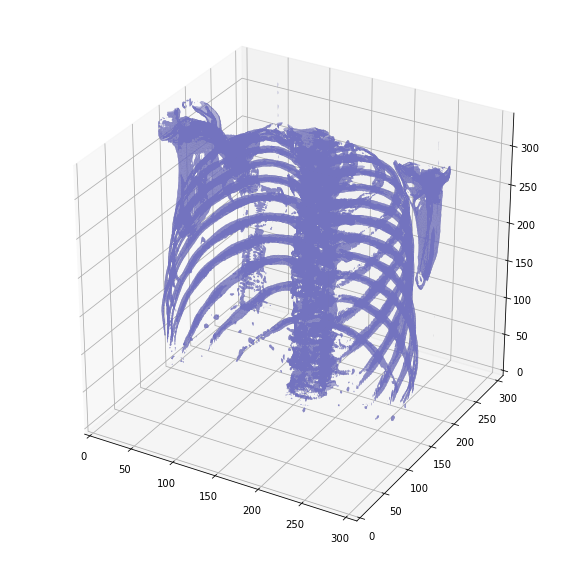

In [48]:
plot_3d(pix_resampled,400)

# Lung segmentation  
In order to reduce the problem space, we can segment the lungs (and usually some tissue around it).  

The steps:  
* Threshold the image (-320 HU is a good threshold, but it doesn't matter much for this approach)  
* Do connected components, determine label of air around person, fill this with 1s in the binary image 
* Optionally: For every axial slice in the scan, determine the largest solid connected component (the body+air around the person), and set others to 0.  This fills the structures in the lungs in the mask.  
* Keep only the largest air pocket (the human body has other pockets of air here and there).  

In [92]:
help(measure.label)

Help on function label in module skimage.measure._label:

label(input, neighbors=None, background=None, return_num=False, connectivity=None)
    Label connected regions of an integer array.
    
    Two pixels are connected when they are neighbors and have the same value.
    In 2D, they can be neighbors either in a 1- or 2-connected sense.
    The value refers to the maximum number of orthogonal hops to consider a
    pixel/voxel a neighbor::
    
      1-connectivity      2-connectivity     diagonal connection close-up
    
           [ ]           [ ]  [ ]  [ ]         [ ]
            |               \  |  /             |  <- hop 2
      [ ]--[x]--[ ]      [ ]--[x]--[ ]    [x]--[ ]
            |               /  |  \         hop 1
           [ ]           [ ]  [ ]  [ ]
    
    Parameters
    ----------
    input : ndarray of dtype int
        Image to label.
    neighbors : {4, 8}, int, optional
        Whether to use 4- or 8-"connectivity".
        In 3D, 4-"connectivity" means co

In [49]:
def largest_label_volume(im, bg=-1):
    vals, counts = np.unique(im, return_counts=True)
    
    counts = counts[vals != bg]
    vals = vals[vals != bg]
    
    if len(counts) > 0:
        return vals[np.argmax(counts)]
    else:
        return None
    
def segment_lung_mask(image, fill_lung_structures=True):
    
    # no actually binary, but 1 and 2.
    # 0 is treated as background, which we do not want
    binary_image = np.array(image > -320, dtype=np.int8)+1
    labels=measure.label(binary_image)
    
    # Pick the pixel in the very corner to determine which label is air.
    #   Improvement: Pick multiple background labels from around the patient
    #   More resitant to "trays" on which the patient lays cutting the air
    #   around the person in half
    background_label = labels[0,0,0]
    
    # Fill the air around the person
    binary_image[background_label == labels] = 2
    
    
    # Method of filling the lung structures (that is superior to something like 
    # morphological closing)
    if fill_lung_structures:
        # For every slice we determine the largest solid structure
        for i, axial_slice in enumerate(binary_image):
            axial_slice = axial_slice - 1
            labeling = measure.label(axial_slice)
            l_max = largest_label_volume(labeling, bg=0)
            
            if l_max is not None: # This slice contains some lung
                binary_image[i][labeling != l_max] = 1 
                
    binary_image -= 1 # Make the image actual binary
    binary_image = 1-binary_image # Invert it, lungs are now 1
    
    # Remove other air pockets insided body
    labels = measure.label(binary_image, background=0)
    l_max = largest_label_volume(labels, bg=0)
    if l_max is not None: # There are air pockets
        binary_image[labels != l_max] =0 
        
    return binary_image

In [ ]:
# look at bolek's comment
#  l_max = largest_label_volume(labels, bg=-1)

In [ ]:
# Gerome Pistre
def largest_label_volume(im, bg=-1):
    vals, counts = np.unique(im, return_counts=True)
    
    counts = counts[vals != bg]
    vals = vals[vals != bg]
    
    biggest=vals[np.argmax(counts)]
    return biggest

In [ ]:
def segment_lung_mask(image, fill_lung_structures=True):
    
    # no actually binary, but 1 and 2.
    # 0 is treated as background, which we do not want
    binary_image = np.array(image > -320, dtype=np.int8)+1
    labels=measure.label(binary_image)
    
    # Pick the pixel in the very corner to determine which label is air.
    #   Improvement: Pick multiple background labels from around the patient
    #   More resitant to "trays" on which the patient lays cutting the air
    #   around the person in half
    background_label = labels[0,0,0]
    
    # Fill the air around the person
    binary_image[background_label == labels] = 2
    
    
    # Method of filling the lung structures (that is superior to something like 
    # morphological closing)
    if fill_lung_structures:
        # For every slice we determine the largest solid structure
        for i, axial_slice in enumerate(binary_image):
            axial_slice = axial_slice - 1
            labeling = measure.label(axial_slice)
            l_max = largest_label_volume(labeling, bg=0)
            
            if l_max is not None: # This slice contains some lung
                binary_image[i][labeling != l_max] = 1 
                
    binary_image -= 1 # Make the image actual binary
    binary_image = 1-binary_image # Invert it, lungs are now 1
    
    # Remove other air pockets insided body
    labels = measure.label(binary_image, background=0)
    l_max = largest_label_volume(labels, bg=0)
    if l_max is not None: # There are air pockets
        binary_image[labels != l_max] =0 
        
    return binary_image

In [50]:
segmented_lungs = segment_lung_mask(pix_resampled, False)
segmented_lungs_fill = segment_lung_mask(pix_resampled, True)

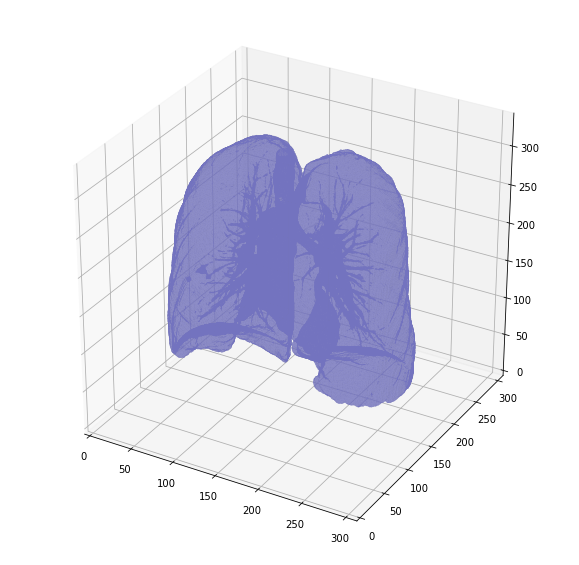

In [51]:
plot_3d(segmented_lungs,0)

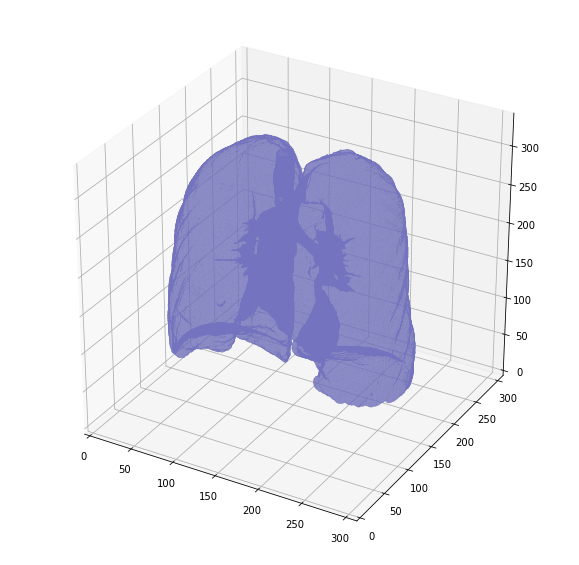

In [52]:
plot_3d(segmented_lungs_fill,0)

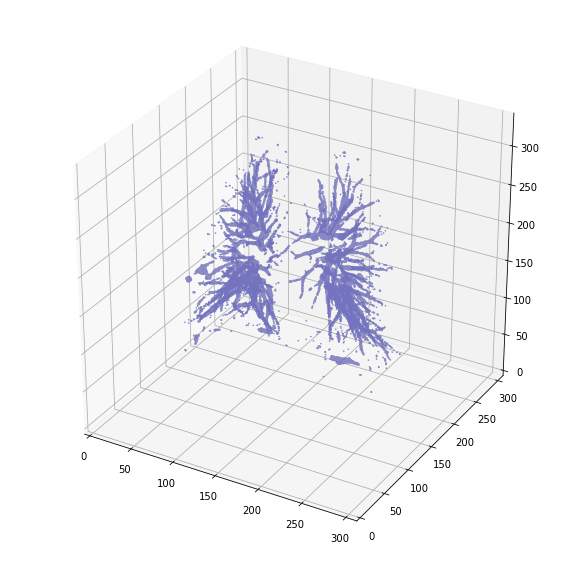

In [53]:
plot_3d(segmented_lungs_fill - segmented_lungs,0)

In [91]:
plot_3d(pix_resampled,0)

KeyboardInterrupt: 

In [90]:
print(type(segmented_lungs));print(type(segmented_lungs_fill));
print(segmented_lungs.shape);print(segmented_lungs_fill.shape)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(335, 306, 306)
(335, 306, 306)


# Normalization 
Our values currently range from -1024 to around 2000.  Anything above 400 is not interesting to us, as these are simply bones with different radiodensity.  Here's some code you can use:

In [54]:
# MANUALLY change MIN_BOUND, MAX_BOUND
MIN_BOUND=-1000.0  
MAX_BOUND=400.0

def normalize(image):
    image = (image - MIN_BOUND)/(MAX_BOUND-MIN_BOUND)
    image[image>1]=1.
    image[image<0]=0.
    return image

# Zero centering  
As a final preprocessing step, it's advisory to 0 center your data so that your mean value is 0.  To do this you simply subtract the mean pixel value from all pixels.  

To determine this mean you simply average all images in the whole dataset.  If that sounds like a lot of work, we found this to be around 0.25 in the LUNA16 competition.  

**Warning: Do not zero center with the mean per image (like is done in some kernels on here).  The CT scanners are calibrated to return accurate HU measurements.  There is no such thing as an image with lower contrast or brightness like in normal pictures.**


In [55]:
PIXEL_MEAN = 0.25

def zero_center(image):
    image = image - PIXEL_MEAN
    return image

In [ ]:
# from rolanddog
# https://www.kaggle.com/gzuidhof/data-science-bowl-2017/full-preprocessing-tutorial
# zero-center, and preserve compressibility

MIN_BOUND = -1000.0
MAX_BOUND = 400.0
PIXEL_MEAN = 0.25
PIXEL_CORR = int((MAX_BOUND -MIN_BOUND)*PIXEL_MEAN) # in this case, 350

def zero_center_w_compress(image):
    image = image - PIXEL_CORR
    return image

In [ ]:
def normalize(image):
    image = (image - MIN_BOUND)/(MAX_BOUND-MIN_BOUND)
    image[image>(1-PIXEL_MEAN)]=1.
    image[image<(0-PIXEL_MEAN)]=0.
    return image

In [159]:
def normalize_to_bounds(image,MIN_BOUND,MAX_BOUND,PIXEL_MEAN=0.25):
    image = (image - MIN_BOUND)/(MAX_BOUND-MIN_BOUND)
    image[image>(1-PIXEL_MEAN)]=1.
    image[image<(0-PIXEL_MEAN)]=0.
    return image    

In [44]:
def normalize(image,MIN_BOUND,MAX_BOUND):
    image = (image - MIN_BOUND)/(MAX_BOUND-MIN_BOUND)
    image[image>1]=1.
    image[image<0]=0.
    return image   

In [160]:
def zero_center_w_compress_to_bounds(image,MIN_BOUND,MAX_BOUND,PIXEL_MEAN=0.25):
    PIXEL_CORR = int((MAX_BOUND -MIN_BOUND)*PIXEL_MEAN)
    image = image - PIXEL_CORR
    return image

In [45]:
def zero_center(image, PIXEL_MEAN):
    image = image - PIXEL_MEAN
    return image

In [65]:
import skimage

In [66]:
skimage.morphology.binary_dilation

<function skimage.morphology.binary.binary_dilation>

General advice from Guido Zuidhof: http://pubs.rsna.org/doi/pdf/10.1148/radiol.11091710

In [104]:
len(first_patient)

134

In [105]:
%time patients_lst = [load_scan(INPUT_FOLDER+samplepatient) for samplepatient in patients]

In [112]:
pd.DataFrame( [len(patient) for patient in patients_lst] ).describe()

0
count   20.00000
mean   180.20000
std     75.23619
min    110.00000
25%    131.75000
50%    167.50000
75%    197.75000
max    435.00000

In [116]:
print( pd.DataFrame( [len(patient) for patient in patients_lst]).mean() )
print( pd.DataFrame( [len(patient) for patient in patients_lst]).median() )

0    180.2
dtype: float64
0    167.5
dtype: float64


In [117]:
INPUT_FOLDER+patients[0]

'./2017datascibowl/sample_images/00cba091fa4ad62cc3200a657aeb957e'

In [119]:
len( os.listdir(INPUT_FOLDER+patients[0]) )

134

In [120]:
len(patients_lst[0])

134

In [30]:
def slices_per_patient(input_folder_path):
    """ slices_per_patient
    @type input_folder_path : Python string 
    """
    patients = os.listdir(input_folder_path)
    patients.sort()
    
    patient_slices_lst = []
    
    for patient in patients:
        Nz = len( os.listdir(input_folder_path + patient))
        patient_slices_lst.append(Nz)
        
    return patient_slices_lst

In [122]:
slices_per_patient_sample = slices_per_patient( INPUT_FOLDER)

In [125]:
print(len(slices_per_patient_sample))
pd.DataFrame( slices_per_patient_sample).describe()

20


0
count   20.00000
mean   180.20000
std     75.23619
min    110.00000
25%    131.75000
50%    167.50000
75%    197.75000
max    435.00000

In [ ]:
# Load the scans in given folder path
def load_scan(path):
    """
    INPUTS/ARGUMENTS 
    ================
    @type path : Python string
    
    @type slices : Python list (for each file in a folder/directory of dicom.dataset.FileDataset  
    each is a slice of the single patient's lung
    """
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

In [158]:
print(type(patients_resampled));print(len(patients_resampled));
print(type(patients_resampled[0]));print(patients_resampled[0].shape);print(patients_resampled[7].shape)

<type 'list'>
20
<type 'numpy.ndarray'>
(167, 128, 128)
(167, 128, 128)


In [93]:
os.listdir( os.getcwd() + "/2017datascibowl/sample_images/") 

['0d2fcf787026fece4e57be167d079383',
 '0a0c32c9e08cc2ea76a71649de56be6d',
 '0de72529c30fe642bc60dcb75c87f6bd',
 '0b20184e0cd497028bdd155d9fb42dc9',
 '00cba091fa4ad62cc3200a657aeb957e',
 '0acbebb8d463b4b9ca88cf38431aac69',
 '0c0de3749d4fe175b7a5098b060982a1',
 '0ca943d821204ceb089510f836a367fd',
 '0d19f1c627df49eb223771c28548350e',
 '0ddeb08e9c97227853422bd71a2a695e',
 '0c98fcb55e3f36d0c2b6507f62f4c5f1',
 '0a38e7597ca26f9374f8ea2770ba870d',
 '0a099f2549429d29b32f349e95fb2244',
 '0c59313f52304e25d5a7dcf9877633b1',
 '0c9d8314f9c69840e25febabb1229fa4',
 '0c37613214faddf8701ca41e6d43f56e',
 '0d941a3ad6c889ac451caf89c46cb92a',
 '0d06d764d3c07572074d468b4cff954f',
 '0bd0e3056cbf23a1cb7f0f0b18446068',
 '0c60f4b87afcb3e2dfa65abbbf3ef2f9']

In [97]:
# Some constants
INPUT_FOLDER = './2017datascibowl/sample_images/'
patients=os.listdir(INPUT_FOLDER)
patients.sort()

In [98]:
first_patient = load_scan(INPUT_FOLDER + patients[0])

In [99]:
# from Python list of 2-dim. numpy array/matrix to 3-dim. numpy array/matrix
first_patient_pixels = get_pixels_hu(first_patient)

In [163]:
patients_resampled[0][0].shape

(128, 128)

In [165]:
patients_lst[0][0].shape

AttributeError: Dataset does not have attribute 'shape'.

In [167]:
print(type(patients_resampled[0].shape))
def norm_zero_images(patient_image,MIN_BOUND,MAX_BOUND,PIXEL_MEAN=0.25):
    """ norm_zero_images - due normalization and zero center on a 3-dim. numpy array/matrix that 
    represents all (total) 2-dim. image slices for a single patient"""
    Nz = patient_image.shape[0]
    new_patient_image = []
    for z_idx in range(Nz):
        patient_normed=normalize_to_bounds(patient_image[z_idx],MIN_BOUND,MAX_BOUND,PIXEL_MEAN)
        patient_normed=zero_center_w_compress_to_bounds(patient_normed,MIN_BOUND,MAX_BOUND,PIXEL_MEAN)
        new_patient_image.append( patient_normed)
    new_patient_image=np.array(new_patient_image)
    return new_patient_image
    

<type 'tuple'>


In [176]:
def norm_zero_images(patient_image,MIN_BOUND,MAX_BOUND,PIXEL_MEAN=0.25):
    """ norm_zero_images - due normalization and zero center on a 3-dim. numpy array/matrix that 
    represents all (total) 2-dim. image slices for a single patient"""
    Nz = patient_image.shape[0]
    new_patient_image = []
    for z_idx in range(Nz):
        patient_normed=normalize_to_bounds(patient_image[z_idx],MIN_BOUND,MAX_BOUND,PIXEL_MEAN)
        new_patient_image.append( patient_normed)
    new_patient_image=np.array(new_patient_image)
    return new_patient_image
    

In [42]:
def norm_zero_images(patient_image,MIN_BOUND,MAX_BOUND,PIXEL_MEAN=0.25):
    """ norm_zero_images - due normalization and zero center on a 3-dim. numpy array/matrix that 
    represents all (total) 2-dim. image slices for a single patient"""
    Nz = patient_image.shape[0]
    new_patient_image = []
    for z_idx in range(Nz):
        patient_normed=normalize(patient_image[z_idx],MIN_BOUND,MAX_BOUND)
        patient_normed=zero_center(patient_normed,PIXEL_MEAN)
        new_patient_image.append( patient_normed)
    new_patient_image=np.array(new_patient_image)
    return new_patient_image
    

In [169]:
print(type(patients_resampled))

<type 'list'>


In [185]:
print(len( patients_resampled_normed ))
print(pd.DataFrame(patients_resampled_normed[0][0]).describe())
pd.DataFrame(patients_resampled_normed[4][6]).describe()

20
              0           1           2           3           4           5    \
count  128.000000  128.000000  128.000000  128.000000  128.000000  128.000000   
mean    -0.212516   -0.147667   -0.116010   -0.083693   -0.058500   -0.040557   
std      0.146754    0.225505    0.246671    0.265201    0.275713    0.283895   
min     -0.250000   -0.250000   -0.250000   -0.250000   -0.250000   -0.250000   
25%     -0.250000   -0.250000   -0.250000   -0.250000   -0.250000   -0.250000   
50%     -0.250000   -0.250000   -0.250000   -0.250000   -0.250000   -0.250000   
75%     -0.250000   -0.250000   -0.216000    0.307167    0.315500    0.334333   
max      0.418000    0.452000    0.406000    0.410667    0.423333    0.394667   

              6           7           8           9       ...             118  \
count  128.000000  128.000000  128.000000  128.000000     ...      128.000000   
mean    -0.022510   -0.002526    0.014297    0.035125     ...        0.025484   
std      0.290399    0.2

0           1           2           3           4           5    \
count  128.000000  128.000000  128.000000  128.000000  128.000000  128.000000   
mean    -0.230599   -0.230245   -0.231547   -0.231187   -0.230729   -0.230807   
std      0.053464    0.062904    0.060050    0.059088    0.064771    0.050273   
min     -0.250000   -0.250000   -0.250000   -0.250000   -0.250000   -0.250000   
25%     -0.250000   -0.250000   -0.250000   -0.250000   -0.250000   -0.250000   
50%     -0.248000   -0.246667   -0.248000   -0.247333   -0.247000   -0.247667   
75%     -0.234500   -0.232333   -0.235667   -0.236167   -0.236333   -0.231833   
max      0.214667    0.423333    0.372667    0.354000    0.448667    0.194000   

              6           7           8           9       ...             118  \
count  128.000000  128.000000  128.000000  128.000000     ...      128.000000   
mean    -0.175568   -0.144021   -0.118594   -0.097125     ...        0.000677   
std      0.182362    0.213400    0.237917    0.251674     ...        0.300971   
min     -0.250000   -0.250000   -0.250000   -0.250000     ...       -0.250000   
25%     -0.250000   -0.250000   -0.250000   -0.250000     ...       -0.249500   
50%     -0.243667   -0.243000   -0.243333   -0.241667     ...       -0.220333   
75%     -0.209500   -0.196500   -0.187667   -0.177833     ...        0.360833   
max      0.483333    0.444667    0.447333    0.461333     ...        0.508667   

              119         120         121         122         123         124  \
count  128.000000  128.000000  128.000000  128.000000  128.000000  128.000000   
mean    -0.021240   -0.039714   -0.066349   -0.096964   -0.125469   -0.170786   
std      0.289309    0.275276    0.259251    0.248110    0.229557    0.171742   
min     -0.250000   -0.250000   -0.250000   -0.250000   -0.250000   -0.250000   
25%     -0.249333   -0.250000   -0.250000   -0.250000   -0.250000   -0.250000   
50%     -0.221000   -0.224667   -0.231000   -0.238000   -0.243667   -0.247000   
75%      0.350167    0.336333    0.150333   -0.075000   -0.174167   -0.208167   
max      0.451333    0.463333    0.450667    0.445333    0.444667    0.424000   

              125         126         127  
count  128.000000  128.000000  128.000000  
mean    -0.214474   -0.233083   -0.232932  
std      0.076303    0.062620    0.052833  
min     -0.250000   -0.250000   -0.250000  
25%     -0.250000   -0.250000   -0.250000  
50%     -0.245000   -0.249000   -0.249000  
75%     -0.218667   -0.237333   -0.237333  
max      0.403333    0.427333    0.165333  

[8 rows x 128 columns]

In [186]:
os.listdir('./2017datascibowl/')

['stage1_sample_submission.csv',
 'stage1_sample_submission.csv.zip',
 'stage1_labels.csv',
 'stage1_labels.csv.zip',
 'sample_images']

In [192]:
yhat_ids = pd.read_csv('./2017datascibowl/stage1_labels.csv')

In [193]:
yhat_ids.head()

id  cancer
0  0015ceb851d7251b8f399e39779d1e7d       1
1  0030a160d58723ff36d73f41b170ec21       0
2  003f41c78e6acfa92430a057ac0b306e       0
3  006b96310a37b36cccb2ab48d10b49a3       1
4  008464bb8521d09a42985dd8add3d0d2       1

In [201]:
yhat_ids_found = yhat_ids.loc[yhat_ids['id'].isin(patients)]

In [209]:
yhat_ids_found;

In [212]:
#yhat_ids_found['id']-pd.DataFrame(patients) 

In [218]:
Set( yhat_ids_found['id']).symmetric_difference(patients)

Set(['0b20184e0cd497028bdd155d9fb42dc9'])

In [225]:
yhat_ids['id'].iloc[:70];

In [231]:
pd.DataFrame(patients)

0
0   00cba091fa4ad62cc3200a657aeb957e
1   0a099f2549429d29b32f349e95fb2244
2   0a0c32c9e08cc2ea76a71649de56be6d
3   0a38e7597ca26f9374f8ea2770ba870d
4   0acbebb8d463b4b9ca88cf38431aac69
5   0b20184e0cd497028bdd155d9fb42dc9
6   0bd0e3056cbf23a1cb7f0f0b18446068
7   0c0de3749d4fe175b7a5098b060982a1
8   0c37613214faddf8701ca41e6d43f56e
9   0c59313f52304e25d5a7dcf9877633b1
10  0c60f4b87afcb3e2dfa65abbbf3ef2f9
11  0c98fcb55e3f36d0c2b6507f62f4c5f1
12  0c9d8314f9c69840e25febabb1229fa4
13  0ca943d821204ceb089510f836a367fd
14  0d06d764d3c07572074d468b4cff954f
15  0d19f1c627df49eb223771c28548350e
16  0d2fcf787026fece4e57be167d079383
17  0d941a3ad6c889ac451caf89c46cb92a
18  0ddeb08e9c97227853422bd71a2a695e
19  0de72529c30fe642bc60dcb75c87f6bd

In [245]:
# pd.concat([pd.DataFrame(patients), yhat_ids_found['id']],join="inner",ignore_index=True)
patients[0] in yhat_ids_found['id'].as_matrix()

True

In [256]:
m = len(patients)
found_indices =[]
for i in range(m):
    if patients[i] in yhat_ids_found['id'].as_matrix():
        found_indices.append(i)

In [257]:
patients_resampled_found = [patients[i] for i in found_indices]

In [263]:
for i in range(len(found_indices)):
    print(patients_resampled_found[i] in yhat_ids_found['id'].as_matrix())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [264]:
y_found=[]
for i in range(len(found_indices)):
    if (patients_resampled_found[i] in yhat_ids_found['id'].as_matrix()):
        y_found.append( yhat_ids_found['cancer'] )

In [294]:
os.listdir(os.getcwd())

['2017datascibowl',
 'data_password.txt.zip',
 'data_password.txt',
 'stage1.7z',
 'LSTM_model201702271930.save',
 'cleaning_dueSigmaFin.pyc',
 'LSTM_model201702280608.save',
 '.ipynb_checkpoints',
 'dueSigmaFinancial_kaggle.py',
 'LSTM_model.save',
 'LSTM_model201703012346.save',
 'glass-classification.zip',
 'DatSciBow2017_FullPreprocessTutorial.ipynb',
 'sample_images.7z',
 'LSTM_model201702282350.save',
 'GRU_model201703022010.save',
 'DueSigmaFin_runs.ipynb',
 'ImagePreprocessing.ipynb',
 'dueSigmaFinancial_local.ipynb',
 'GRU_model201703012348.save',
 'GRU_model201703050709.save',
 'GRU_model201703021741.save',
 'kaggle.ipynb',
 'glass.csv',
 'train.h5.zip',
 '__init__.py',
 'train.h5',
 'stage1.torrent',
 'dueSigmaFinancial_local_GRUs.ipynb',
 'cleaning_dueSigmaFin.py']

# Summary

In [126]:
# Some constants
INPUT_FOLDER = './2017datascibowl/sample_images/'
patients=os.listdir(INPUT_FOLDER)
patients.sort()

In [133]:
Nz_lst = slices_per_patient(INPUT_FOLDER)
Nz_tot= int( pd.DataFrame(Nz_lst).median() )

In [134]:
%time patients_lst = [load_scan(INPUT_FOLDER+samplepatient) for samplepatient in patients]

167

In [136]:
%time patients_pixels = [get_pixels_hu(patient) for patient in patients_lst]

CPU times: user 4.23 s, sys: 450 ms, total: 4.68 s
Wall time: 5.94 s


In [140]:
pixels_and_patients=zip(patients_pixels,patients_lst)

In [152]:
Nx=128
Ny=128
# pix_resampled_given,spacing_given=resample_given_dims( first_patient_pixels, first_patient, [167,128,128])
%time patients_resampled,spacings_new=map(list, \
                                          zip(*[resample_given_dims(patient_pixels,\
                                                                    patient,\
                                                                  [Nz_tot,Nx,Ny]) for patient_pixels,patient in pixels_and_patients])) 


CPU times: user 1min 9s, sys: 4.83 s, total: 1min 14s
Wall time: 1min 14s


In [168]:
MIN_BOUND=-1000.0
MAX_BOUND=500.0
PIXEL_MEAN=0.25


In [182]:
patients_resampled_normed = [norm_zero_images(patient_image,\
                  MIN_BOUND,\
                  MAX_BOUND,\
                  PIXEL_MEAN) for patient_image in patients_resampled]

In [292]:
y_found

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [290]:
print(len(patients_resampled_normed_found))

19


### Get the y value (outcomes), by matching patient IDs

In [265]:
os.listdir('./2017datascibowl/');
y_ids = pd.read_csv('./2017datascibowl/stage1_labels.csv')

In [266]:
y_ids_found=y_ids.loc[yhat_ids['id'].isin(patients)]

In [267]:
m = len(patients)
found_indices =[]
for i in range(m):
    if patients[i] in y_ids_found['id'].as_matrix():
        found_indices.append(i)

In [268]:
patients_resampled_found = [patients[i] for i in found_indices]

In [282]:
y_found=[]
for i in range(len(found_indices)):
    if (patients_resampled_found[i] in yhat_ids_found['id'].as_matrix()):
        cancer_val = y_ids_found.loc[y_ids_found['id']==patients_resampled_found[i]]['cancer'].as_matrix()
        y_found.append( cancer_val )

In [288]:
y_found=np.array(y_found).flatten()

In [289]:
patients_resampled_normed_found=[patients_resampled_normed[idx] for idx in found_indices]

In [275]:
patients_resampled_found[2]

'0a0c32c9e08cc2ea76a71649de56be6d'

In [287]:
np.array(y_found).flatten()

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

# Process Whole 

In [2]:
os.listdir('./2017datascibowl/')

['stage1_sample_submission.csv',
 'stage1_sample_submission.csv.zip',
 'stage1_labels.csv',
 'stage1_labels.csv.zip',
 'stage1',
 'sample_images']

In [4]:
stage1_labels_csv = pd.read_csv("./2017datascibowl/stage1_labels.csv")

In [7]:
stage1_labels_csv.head()

id  cancer
0  0015ceb851d7251b8f399e39779d1e7d       1
1  0030a160d58723ff36d73f41b170ec21       0
2  003f41c78e6acfa92430a057ac0b306e       0
3  006b96310a37b36cccb2ab48d10b49a3       1
4  008464bb8521d09a42985dd8add3d0d2       1

In [8]:
stage1_labels_csv.describe()

cancer
count  1397.000000
mean      0.259127
std       0.438312
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

In [12]:
stage1_labels_csv.as_matrix().shape

(1397, 2)

In [9]:
stage1_sample_submission_csv = pd.read_csv("./2017datascibowl/stage1_sample_submission.csv")

In [10]:
stage1_sample_submission_csv.head()

id  cancer
0  026470d51482c93efc18b9803159c960     0.5
1  031b7ec4fe96a3b035a8196264a8c8c3     0.5
2  03bd22ed5858039af223c04993e9eb22     0.5
3  06a90409e4fcea3e634748b967993531     0.5
4  07b1defcfae5873ee1f03c90255eb170     0.5

In [11]:
stage1_sample_submission_csv.describe()

cancer
count   198.0
mean      0.5
std       0.0
min       0.5
25%       0.5
50%       0.5
75%       0.5
max       0.5

In [13]:
stage1_sample_submission_csv.as_matrix().shape

(198, 2)

In [14]:
stage1_labels_csv.cancer.median()

0.0

In [15]:
stage1_sample_submission_csv["cancer"]

0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
5      0.5
6      0.5
7      0.5
8      0.5
9      0.5
10     0.5
11     0.5
12     0.5
13     0.5
14     0.5
15     0.5
16     0.5
17     0.5
18     0.5
19     0.5
20     0.5
21     0.5
22     0.5
23     0.5
24     0.5
25     0.5
26     0.5
27     0.5
28     0.5
29     0.5
      ... 
168    0.5
169    0.5
170    0.5
171    0.5
172    0.5
173    0.5
174    0.5
175    0.5
176    0.5
177    0.5
178    0.5
179    0.5
180    0.5
181    0.5
182    0.5
183    0.5
184    0.5
185    0.5
186    0.5
187    0.5
188    0.5
189    0.5
190    0.5
191    0.5
192    0.5
193    0.5
194    0.5
195    0.5
196    0.5
197    0.5
Name: cancer, dtype: float64

### Stage 1 File I/O

In [17]:
patients_stage1 = os.listdir('./2017datascibowl/stage1')

In [18]:
print(len(patients_stage1))

1595


#### Stage 1 labels

In [19]:
stage1_labels_csv["id"].describe()

count                                 1397
unique                                1397
top       733205c5d0bbf19f5c761e0c023bf9a0
freq                                     1
Name: id, dtype: object

In [21]:
stage1_labels_csv["id"].as_matrix()

array(['0015ceb851d7251b8f399e39779d1e7d',
       '0030a160d58723ff36d73f41b170ec21',
       '003f41c78e6acfa92430a057ac0b306e', ...,
       'fe5c37e82b412833b8ad0abb57978377',
       'ff5d8e90500cf324e7b04a2f07cf0399',
       'ffe02fe7d2223743f7fb455dfaff3842'], dtype=object)

In [23]:
len( set(patients_stage1).difference(set(stage1_labels_csv["id"].as_matrix())) )

198

In [24]:
set(stage1_labels_csv["id"].as_matrix()).difference( set(patients_stage1))

set()

In [26]:
len( set(patients_stage1).symmetric_difference(set(stage1_labels_csv["id"].as_matrix()))  )

198

In [28]:
len(patients_stage1)

1595

In [31]:
Nz_lst = slices_per_patient('./2017datascibowl/stage1/')
Nz_tot= int( pd.DataFrame(Nz_lst).median() )

In [35]:
patient_0 = load_scan('./2017datascibowl/stage1/'+patients_stage1[0])

In [38]:
patient_pixels_0 = get_pixels_hu(patient_0)

In [41]:
Nx=128
Ny=128
# pix_resampled_given,spacing_given=resample_given_dims( first_patient_pixels, first_patient, [167,128,128])
%time patient_resampled_0,spacing_new_0=resample_given_dims(patient_pixels_0,\
                                                                    patient_0,\
                                                                  [Nz_tot,Nx,Ny]) 

CPU times: user 2.64 s, sys: 0 ns, total: 2.64 s
Wall time: 2.53 s


In [47]:
MIN_BOUND=-1000.0
MAX_BOUND=500.0
PIXEL_MEAN=0.25

patient_resampled_norm_0=norm_zero_images(patient_resampled_0,\
                  MIN_BOUND,\
                  MAX_BOUND,\
                  PIXEL_MEAN)

In [51]:
patient_resampled_norm_0.flatten().shape

(2621440,)

In [50]:
spacing_new_0

array([ 1.75      ,  3.20312405,  3.20312405])

In [65]:
print( patient_0[0].ImagePositionPatient )
print( patient_0[0].ImageOrientationPatient )
print( patient_0[1].ImagePositionPatient )
print( patient_0[1].ImageOrientationPatient )
print( patient_0[2].ImagePositionPatient )
print( patient_0[2].ImageOrientationPatient )


['-202.899994', '-238.300003', '-294.119995']
['1.000000', '0.000000', '0.000000', '0.000000', '1.000000', '0.000000']
['-202.899994', '-238.300003', '-291.619995']
['1.000000', '0.000000', '0.000000', '0.000000', '1.000000', '0.000000']
['-202.899994', '-238.300003', '-289.119995']
['1.000000', '0.000000', '0.000000', '0.000000', '1.000000', '0.000000']


In [66]:
patient_0[0].ImageOrientationPatient

['1.000000', '0.000000', '0.000000', '0.000000', '1.000000', '0.000000']

In [54]:
patient_0[1]

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.55.300863971221291381526736132231562757912
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: '29883252ce0ce3e052ce8cf4932623af'
(0010, 0020) Patient ID                          LO: '29883252ce0ce3e052ce8cf4932623af'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0050) Slice Thickness                     DS: '2.5'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.51329352781293882739991701446693132102457555138147446375828
(0020, 000e) Series Instance UID                 UI: 2.25.41601713747120404656977043488053459221091478746332764467723
(0020, 0011) Series Number               

In [61]:
print(patient_0[0].ImagePositionPatient)
print(patient_0[0].SliceThickness)
print(patient_0[0].PixelSpacing)
dir(patient_0[0]);

['-202.899994', '-238.300003', '-294.119995']
2.5
['0.800781', '0.800781']


In [62]:
print(patient_0[0].ImageOrientationPatient)

['1.000000', '0.000000', '0.000000', '0.000000', '1.000000', '0.000000']


In [63]:
patient_0[0]

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.55.158257041710393617309832979737744229653
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: '29883252ce0ce3e052ce8cf4932623af'
(0010, 0020) Patient ID                          LO: '29883252ce0ce3e052ce8cf4932623af'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0050) Slice Thickness                     DS: '2.5'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.51329352781293882739991701446693132102457555138147446375828
(0020, 000e) Series Instance UID                 UI: 2.25.41601713747120404656977043488053459221091478746332764467723
(0020, 0011) Series Number               

In [68]:
np.array(patient_0[0].ImagePositionPatient[:2])

array([-202.899994, -238.300003])

In [67]:
np.array(patient_0[0].ImageOrientationPatient)

array([ 1.,  0.,  0.,  0.,  1.,  0.])

In [71]:
patient_resampled_norm_0.flatten()

array([-0.25, -0.25, -0.25, ..., -0.25, -0.25, -0.25])

In [70]:
np.concatenate([patient_resampled_norm_0.flatten(),
                np.array(patient_0[0].ImagePositionPatient[:2]),
                np.array( patient_0[0].ImageOrientationPatient) ] ).shape

(2621448,)

In [54]:
def process_patient(patientname,    
                                MIN_BOUND=-1000.0,
                                MAX_BOUND=500.0,
                                PIXEL_MEAN=0.25,
                                INPUT_FOLDER='./2017datascibowl/stage1/',
                                N_x=128,N_y=128,):
    """ process_patient - process single patient """
    patient = load_scan(INPUT_FOLDER +patientname)
    
    Nz_lst = slices_per_patient( INPUT_FOLDER )
    print( "Nz_lst: %d" % len(Nz_lst))
    Nz_tot= int( pd.DataFrame(Nz_lst).median() )
    print( "\n Nz_tot : %d" % Nz_tot)
    patient_pixels = get_pixels_hu(patient)
    print( patient_pixels.shape)
    
    patient_resampled,spacing_new=resample_given_dims(patient_pixels,patient,[Nz_tot,N_x,N_y]) 
    print(patient_resampled.shape)
    patient_resampled_norm=norm_zero_images(patient_resampled,MIN_BOUND,MAX_BOUND,PIXEL_MEAN)
    
    patient_feature_vec = np.concatenate([patient_resampled_norm.flatten(),
                                            np.array(patient[0].ImagePositionPatient[:2]),
                                            np.array( patient[0].ImageOrientationPatient) ] )
    return patient_feature_vec

In [41]:
def save_feat_vec(patient_feature_vec,patientname,sub_name="stage1_feat"):
#def save_feat_vec(patient_feature_vec,patientname): original
    #    f=file( "./2017datascibowl/stage1_feat/"+patientname + "feat_vec" ,"wb")
    f=file( "./2017datascibowl/"+sub_name+"/"+patientname + "feat_vec" ,"wb")
    np.save(f,patient_feature_vec)
    f.close()
    

In [55]:
patient0_feature_vec = process_patient(patients_stage1[0])

Nz_lst: 1595

 Nz_tot : 160
(112, 512, 512)
(112, 0, 0)


In [43]:
save_feat_vec( patient0_feature_vec, patients_stage1[0])

In [90]:
os.getcwd()

'/home/topolo/PropD/MLgrabbag/kaggle'

In [44]:
patient0_feature_vec

array([-202.899994, -238.300003,    1.      ,    0.      ,    0.      ,
          0.      ,    1.      ,    0.      ])

In [93]:
test_patient0_feat_vec=np.load("./2017datascibowl/stage1_feat/"+patients_stage1[0]+"feat_vec")

In [94]:
test_patient0_feat_vec

array([-0.25, -0.25, -0.25, ...,  0.  ,  1.  ,  0.  ])

In [95]:
test_patient0_feat_vec.shape

(2621448,)

In [96]:
for patient_name in patients_stage1:
    patient_feature_vec = process_patient(patient_name)
    save_feat_vec( patient_feature_vec, patient_name)
    

/home/topolo/Public/anaconda2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [97]:
len(patients_stage1)

1595

In [98]:
patients_stage1_feat = os.listdir('./2017datascibowl/stage1_feat')
print(len(patients_stage1_feat))

1595


# Stage 1 Low-Res Preprocess

In [2]:
# Load the scans in given folder path
def load_scan(path):
    """
    INPUTS/ARGUMENTS 
    ================
    @type path : Python string
    
    @type slices : Python list (for each file in a folder/directory of dicom.dataset.FileDataset  
    each is a slice of the single patient's lung
    """
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

In [3]:
def slices_per_patient(input_folder_path):
    """ slices_per_patient
    @type input_folder_path : Python string 
    """
    patients = os.listdir(input_folder_path)
    patients.sort()
    
    patient_slices_lst = []
    
    for patient in patients:
        Nz = len( os.listdir(input_folder_path + patient))
        patient_slices_lst.append(Nz)
        
    return patient_slices_lst

In [4]:
def get_pixels_hu(slices):
    """
    INPUTS/ARGUMENTS
    ================
    @type slices : Python list of dicom.dataset.FileDataset, 
    @param slices : each dicom.dataset.FileDataset representing an image "slice" of a single patient's lung
    """
    image = np.stack([s.pixel_array for s in slices]) # np.array image.shape (134,512,512)
    # Convert to int16 (from sometimes int16),
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)
    
    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    # suggested by Henry Wolf to avoid -2048 values
    outside_of_image_val = image.min()
    image[image == outside_of_image_val] = 0 
    
    image[image == -2000] = 0 
    
    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
        
    return np.array(image, dtype=np.int16)

In [5]:
def resample_given_dims(image, scan, new_shape):
    # Determine current pixel spacing
    spacing = np.array([scan[0].SliceThickness] + scan[0].PixelSpacing, dtype=np.float32)  # (\Delta z,\Delta x,\Delta y)
    
    real_resize_factor=new_shape/np.array(image.shape).astype("float32")  
    
    new_spacing = spacing/real_resize_factor # (\Delta z',\Delta x',\Delta y')
        
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
    
    return image, new_spacing

In [6]:
def norm_zero_images(patient_image,MIN_BOUND,MAX_BOUND,PIXEL_MEAN=0.25):
    """ norm_zero_images - due normalization and zero center on a 3-dim. numpy array/matrix that 
    represents all (total) 2-dim. image slices for a single patient"""
    Nz = patient_image.shape[0]
    new_patient_image = []
    for z_idx in range(Nz):
        patient_normed=normalize(patient_image[z_idx],MIN_BOUND,MAX_BOUND)
        patient_normed=zero_center(patient_normed,PIXEL_MEAN)
        new_patient_image.append( patient_normed)
    new_patient_image=np.array(new_patient_image)
    return new_patient_image
    

In [7]:
def normalize(image,MIN_BOUND,MAX_BOUND):
    image = (image - MIN_BOUND)/(MAX_BOUND-MIN_BOUND)
    image[image>1]=1.
    image[image<0]=0.
    return image   

In [8]:
def zero_center(image, PIXEL_MEAN):
    image = image - PIXEL_MEAN
    return image

In [9]:
def process_patient(patientname,    
                                MIN_BOUND=-1000.0,
                                MAX_BOUND=500.0,
                                PIXEL_MEAN=0.25,
                                INPUT_FOLDER='./2017datascibowl/stage1/',
                                N_x=128,N_y=128,):
    """ process_patient - process single patient """
    patient = load_scan(INPUT_FOLDER +patientname)
    
    Nz_lst = slices_per_patient( INPUT_FOLDER )
    Nz_tot= int( pd.DataFrame(Nz_lst).median() )
    patient_pixels = get_pixels_hu(patient)
    
    patient_resampled,spacing_new=resample_given_dims(patient_pixels,patient,[Nz_tot,N_x,N_y]) 
    patient_resampled_norm=norm_zero_images(patient_resampled,MIN_BOUND,MAX_BOUND,PIXEL_MEAN)
    
    patient_feature_vec = np.concatenate([patient_resampled_norm.flatten(),
                                            np.array(patient[0].ImagePositionPatient[:2]),
                                            np.array( patient[0].ImageOrientationPatient) ] )
    return patient_feature_vec

In [10]:
def save_feat_vec(patient_feature_vec,patientname,sub_name="stage1_feat"):
#def save_feat_vec(patient_feature_vec,patientname): original
    #    f=file( "./2017datascibowl/stage1_feat/"+patientname + "feat_vec" ,"wb")
    f=file( "./2017datascibowl/"+sub_name+"/"+patientname + "feat_vec" ,"wb")
    np.save(f,patient_feature_vec)
    f.close()

In [11]:
import os, sys
os.getcwd()
os.listdir( os.getcwd() ) 

['2017datascibowl',
 'data_password.txt',
 'LSTM_model201702271930.save',
 'cleaning_dueSigmaFin.pyc',
 'LSTM_model201702280608.save',
 '.ipynb_checkpoints',
 'dueSigmaFinancial_kaggle.py',
 'LSTM_model.save',
 'LSTM_model201703012346.save',
 'DatSciBow2017_FullPreprocessTutorial.ipynb',
 'LSTM_model201702282350.save',
 'GRU_model201703022010.save',
 'DueSigmaFin_runs.ipynb',
 'ImagePreprocessing.ipynb',
 'dueSigmaFinancial_local.ipynb',
 'GRU_model201703012348.save',
 'GRU_model201703050709.save',
 'GRU_model201703021741.save',
 'kaggle.ipynb',
 'glass.csv',
 'DatSciBow2017_SVM.ipynb',
 '__init__.py',
 'train.h5',
 'dueSigmaFinancial_local_GRUs.ipynb',
 'cleaning_dueSigmaFin.py']

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt

In [13]:
patients_stage1 = os.listdir('./2017datascibowl/stage1')
print(len(patients_stage1))

1595


In [14]:
N_x=32
N_y=32

In [15]:
%time 
for patient_name in patients_stage1:
    patient_feature_vec = process_patient(patient_name,N_x=N_x,N_y=N_y)
    save_feat_vec( patient_feature_vec, patient_name,sub_name="stage1_feat_lowres32")

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.2 µs


/home/topolo/Public/anaconda2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [117]:
%time 
for patient_name in patients_stage1:
    patient_feature_vec = process_patient(patient_name,N_x=N_x,N_y=N_y)
    save_feat_vec( patient_feature_vec, patient_name,sub_name="stage1_feat_lowres32")

CPU times: user 12 µs, sys: 1 µs, total: 13 µs
Wall time: 13.8 µs


/home/topolo/Public/anaconda2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [16]:
import time

In [17]:
N_x=64
N_y=64
t1 = time.time()
for patient_name in patients_stage1:
    patient_feature_vec = process_patient(patient_name,N_x=N_x,N_y=N_y)
    save_feat_vec( patient_feature_vec, patient_name,sub_name="stage1_feat_lowres"+str(N_x))
t2=time.time()
print((t2-t1)*1000*1000.) # in seconds

/home/topolo/Public/anaconda2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


8353555423.97


In [115]:
patient_feature_vec_test = process_patient(patients_stage1[0],N_x=N_x,N_y=N_y)

In [116]:
patient_feature_vec_test.shape

(40968,)